# INSE 6630 Recent Developments in Information Systems Security - Group Project

---
Group Members:
- Rakshith Raj Gurupura Puttaraju  - 40235325
- Rahul Ravi Hulli - 40234542
- Mustafa Talha Ucar  - 40059335
- Anita Francis Archibong - 27729790
- Josephine Famiyeh - 40262544
---

This notebook is created for a team project in the INSE 6630 Recent Developments in Information Systems Security course at Concordia University, Montreal, Canada, in the fall semester of 2023. The purpose of the project is to analyze and compare a variety of machine learning techniques for their capability in detecting network intrusions, employing the KDD Cup'99 dataset for this analysis.

---

This notebook includes an examination of the dataset, along with data visualization and preprocessing steps.

In [23]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset
In this project, the [KDD99 dataset](https://datahub.io/machine-learning/kddcup99#data), which is commonly utilized in academia and research for network traffic analysis, will be employed.

Containing 4,898,430 entries and 42 attributes, the dataset's features are divided into three main categories:

Fundamental characteristics of network connections.
Content-related features derived from domain expertise.
Traffic-related features, determined over a time frame of two seconds.

In this project, the KDD99 dataset, which is commonly utilized in academia and research for network traffic analysis, will be employed.

Containing 4,940,20 entries and 42 attributes, the dataset's features are divided into three main categories:

Fundamental characteristics of network connections.
Content-related features derived from domain expertise.
Traffic-related features, determined over a time frame of two seconds.

**Fundamental Network Connection Features: (9)**

| Attribute        | Data Type    | Description                                                        |
| ---------------- | ------------ | ------------------------------------------------------------------ |
| duration         | Numerical    | Length of the connection in seconds                                |
| protocol_type    | Categorical  | Type of protocol employed (e.g., tcp, udp)                         |
| service          | Categorical  | Type of network service on the destination (e.g., http, telnet)    |
| src_bytes        | Numerical    | Data bytes transferred from source to destination                 |
| dst_bytes        | Numerical    | Data bytes transferred from destination to source                 |
| flag             | Categorical  | Status of the connection (normal or error)                         |
| land             | Categorical  | Indicates if the connection is to/from the same host or port      |
| wrong_fragment   | Numerical    | Count of incorrect fragments                                       |
| urgent           | Numerical    | Count of urgent packets                                            |


**Content-Based Features (12)**

| Attribute | Data Type | Description |
| --- | --- | --- |
| hot | numerical | Counts of "hot" indicators |
| num_failed_login | numerical | Count of unsuccessful login attempts |
| logged_in | categorical | Indicates successful login (1) or not (0) |
| num_compromised | numerical | Number of "compromised" conditions found |
| root_shell | categorical | Indicates if root shell was accessed (1 for yes, 0 for no) |
| su_attempted | categorical | Shows attempts of "su root" command (1 for attempted, 0 for not) |
| num_root | numerical | Total instances of 'root' access |
| num_file_creations | numerical | Count of file creation operations |
| num_shell | numerical | Number of instances involving shell prompts |
| num_outbound_cmds | numerical | Count of outbound commands in an FTP session |
| is_hot_login | categorical | Indicates if login is on the 'hot' list (1 for yes, 0 for no) |
| is_guest_login | categorical | Marks if the login was a 'guest' login (1 for yes, 0 for no) |


**Network Traffic Attributes: Traffic-Related Features (20)**

These values are computed over a 2-second window.

| Attribute | Type | Description |
| --- | --- | --- |
| count | numerical | Number of connections to the same host as the current connection in the past 2 seconds |
| - | - | *(following attributes relate to connections to the same host)* |
| serror_rate | numerical | Percentage of connections that have "SYN" errors |
| rerror_rate | numerical | Percentage of connections that have "REJ" errors |
| same_srv_rate | numerical | Percentage of connections to the same service |
| diff_srv_rate | numerical | Percentage of connections to a different service |
| srv_count | numerical | Number of connections to the same service |
| - | - | *(the following attributes are for connections to the same service)* |
| srv_serror_rate | numerical | Percentage of connections that have "SYN" errors |
| srv_rerror_rate | numerical | Percentage of connections that have "REJ" errors |
| srv_diff_host_rate | numerical | Percentage of connections to a different host |
| dst_host_count | numerical | Number of connections to the same destination host |
| dst_host_srv_count | numerical | Number of connections to the same service/port number |
| dst_host_same_srv_rate | numerical | Percentage of connections to the same service |
| dst_host_diff_srv_rate | numerical | Percentage of connections to a different service |
| dst_host_same_src_port_rate | numerical | Percentage of connections to the same service/port number |
| dst_host_diff_src_port_rate | numerical | Percentage of connections to a different service/port number |
| dst_host_serror_rate | numerical | Percentage of connections with "SYN" error (to the same host) |
| dst_host_rerror_rate | numerical | Percentage of connections with "REJ" error (to the same host) |
| dst_host_srv_serror_rate | numerical | Percentage of connections with "SYN" error (to the same service) |
| dst_host_srv_rerror_rate | numerical | Percentage of connections with "REJ" error (to the same service) |


**Label:**
The categorical column is comprised of two possible values: 'normal' or the specific attack name.

In [24]:
# Loading the dataset
df = pd.read_csv("kddcup99.csv")

## Data Cleaning Tasks

**TODO:**

- Correct any typographical errors in the column names.
- Group or categorize entries in the label column.


In [25]:

# Displaying dataset information
print(f"Dataset information:\n")
print(df.info())

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 

In [26]:
# Displaying count of original attack types
original_attack_types = df['label'].value_counts()
print(f"Original attack types:\n{original_attack_types}")


Original attack types:
label
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64


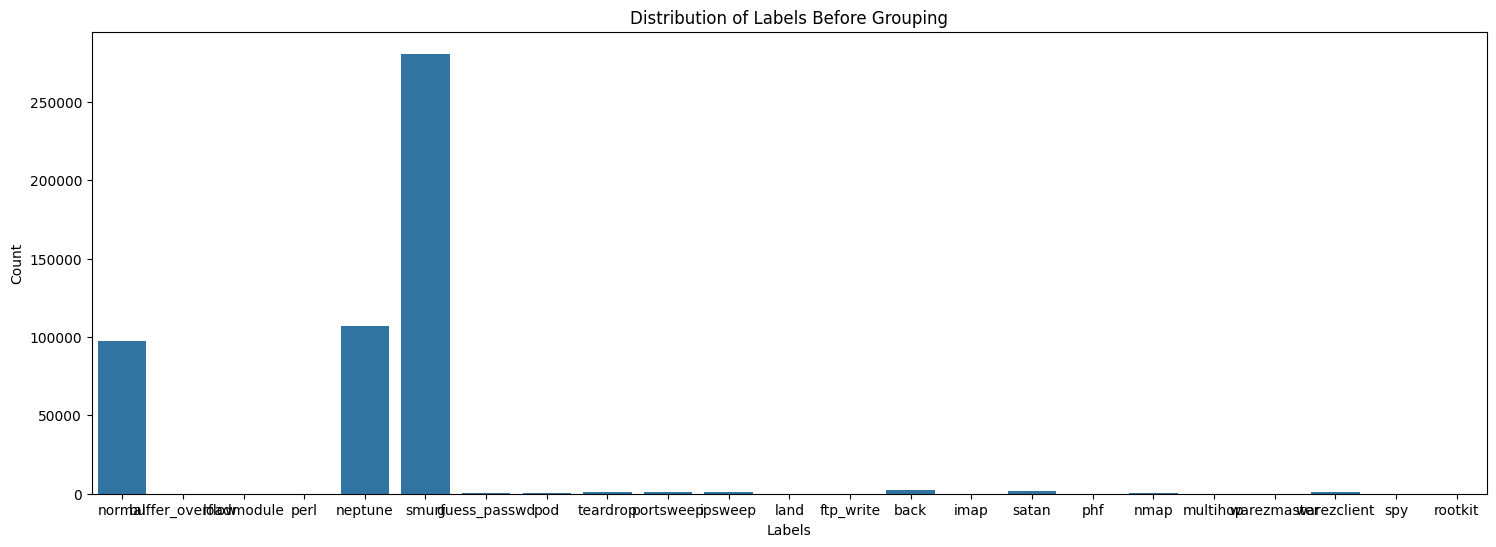

In [27]:
# Visualizing the distribution of labels before grouping
plt.figure(figsize=(18, 6))
plt.title("Distribution of Labels Before Grouping")
sns.countplot(data=df, x='label')
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

In [28]:
# Define a dictionary to map original attack types to grouped categories
attacks = {
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l'
}

# Replace the original attack types with grouped categories in the 'label' column
df['label'] = df['label'].replace(attacks)

# Count the grouped attack types
grouped_attack_counts = df['label'].value_counts()

# Display the grouped attack types
print("Grouped attack types:")
print(grouped_attack_counts)


Grouped attack types:
label
dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64


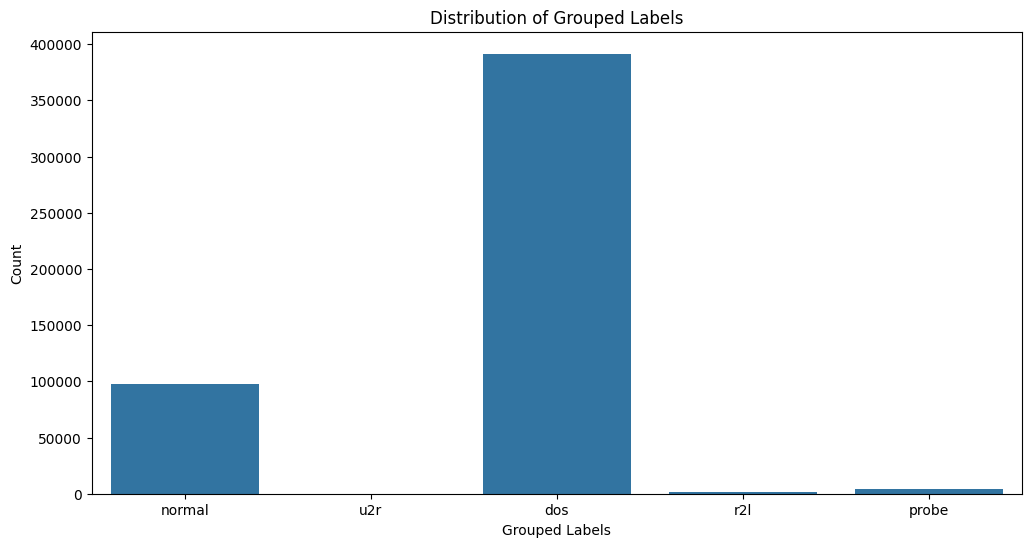

In [29]:
# visualization of labels after grouping

# Set the figure size and title
plt.figure(figsize=(12, 6))
plt.title("Distribution of Grouped Labels")

# Create a countplot to visualize the distribution
sns.countplot(data=df, x='label')

# Label the x-axis and y-axis
plt.xlabel("Grouped Labels")
plt.ylabel("Count")

# Display the plot
plt.show()

The plot clearly illustrates that the distribution of labels is imbalanced, primarily because of the unique characteristics of each type of attack.

The 'DOS' attack type dominates the dataset, surpassing even the frequency of 'normal' behavior. This can be attributed to the way DOS attacks function, as they overload the network with requests, overwhelming regular traffic.

Following that, we observe the 'normal' behavior category, which contains significantly more instances than the other attack types (except for 'DOS'). This is expected since the majority of network users engage in legitimate activities and don't attempt network attacks.

In contrast, the 'R2L' and 'U2R' attack types have a minimal number of instances. This is because these attack categories often involve exploiting vulnerabilities in a single connection, leading to a limited number of occurrences.

### Categorical features

In [30]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print(f"Categorical features: {categorical_cols}")

# note that label is not a feature in this case, it is our class (i.e. output) 
# which we want to be categorical hence we did not map it into numerical variable

Categorical features: ['protocol_type', 'service', 'flag', 'label']


We need to transform these features into a format where they are represented solely by numerical values.

In [31]:
# replacing protocol_type
df['protocol_type'].value_counts().index.tolist()


['icmp', 'tcp', 'udp']

In [32]:
protocol_types_dict = {
    'tcp': 0,
    'udp': 1,
    'icmp': 2
}

df['protocol_type'] = df['protocol_type'].apply(lambda x: protocol_types_dict.get(x, x))

print(f"Mapped protocol types: {df['protocol_type'].unique()}")


Mapped protocol types: [0 1 2]


In [33]:
print(f"Possible values for flag:\n{df['flag'].unique()}")

Possible values for flag:
['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']


In [34]:
flag_map = {
    'SF': 0, 'S1': 1, 'REJ': 2,
    'S2': 3, 'S0': 4, 'S3': 5,
    'RSTO': 6, 'RSTR': 7,  'RSTOS0': 8, 
    'OTH': 9, 'SH': 10
}

df['flag'].replace(flag_map, inplace=True)

print(f"Mapped flags:\n{df['flag'].unique()}")

Mapped flags:
[ 0  1  2  3  4  5  6  7  8  9 10]


In [35]:
unique_service_values = df['service'].value_counts().index.tolist()
print(f"Possible values for service:\n{unique_service_values}")


Possible values for service:
['ecr_i', 'private', 'http', 'smtp', 'other', 'domain_u', 'ftp_data', 'eco_i', 'ftp', 'finger', 'urp_i', 'telnet', 'ntp_u', 'auth', 'pop_3', 'time', 'csnet_ns', 'remote_job', 'gopher', 'imap4', 'discard', 'domain', 'iso_tsap', 'systat', 'shell', 'echo', 'rje', 'whois', 'sql_net', 'printer', 'nntp', 'courier', 'sunrpc', 'netbios_ssn', 'mtp', 'vmnet', 'uucp_path', 'uucp', 'klogin', 'bgp', 'ssh', 'supdup', 'nnsp', 'login', 'hostnames', 'efs', 'daytime', 'link', 'netbios_ns', 'pop_2', 'ldap', 'netbios_dgm', 'exec', 'http_443', 'kshell', 'name', 'ctf', 'netstat', 'Z39_50', 'IRC', 'urh_i', 'X11', 'tim_i', 'pm_dump', 'tftp_u', 'red_i']


In [36]:
service_map = {service: i for i, service in enumerate(df['service'].unique())}

df['service'] = df['service'].map(service_map)

print(f"Mapped values for service:\n{df['service'].unique()}")


Mapped values for service:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]


### Correlation Analysis
We examine the correlation between all columns to identify and potentially remove those that exhibit high correlation with each other.

<Axes: >

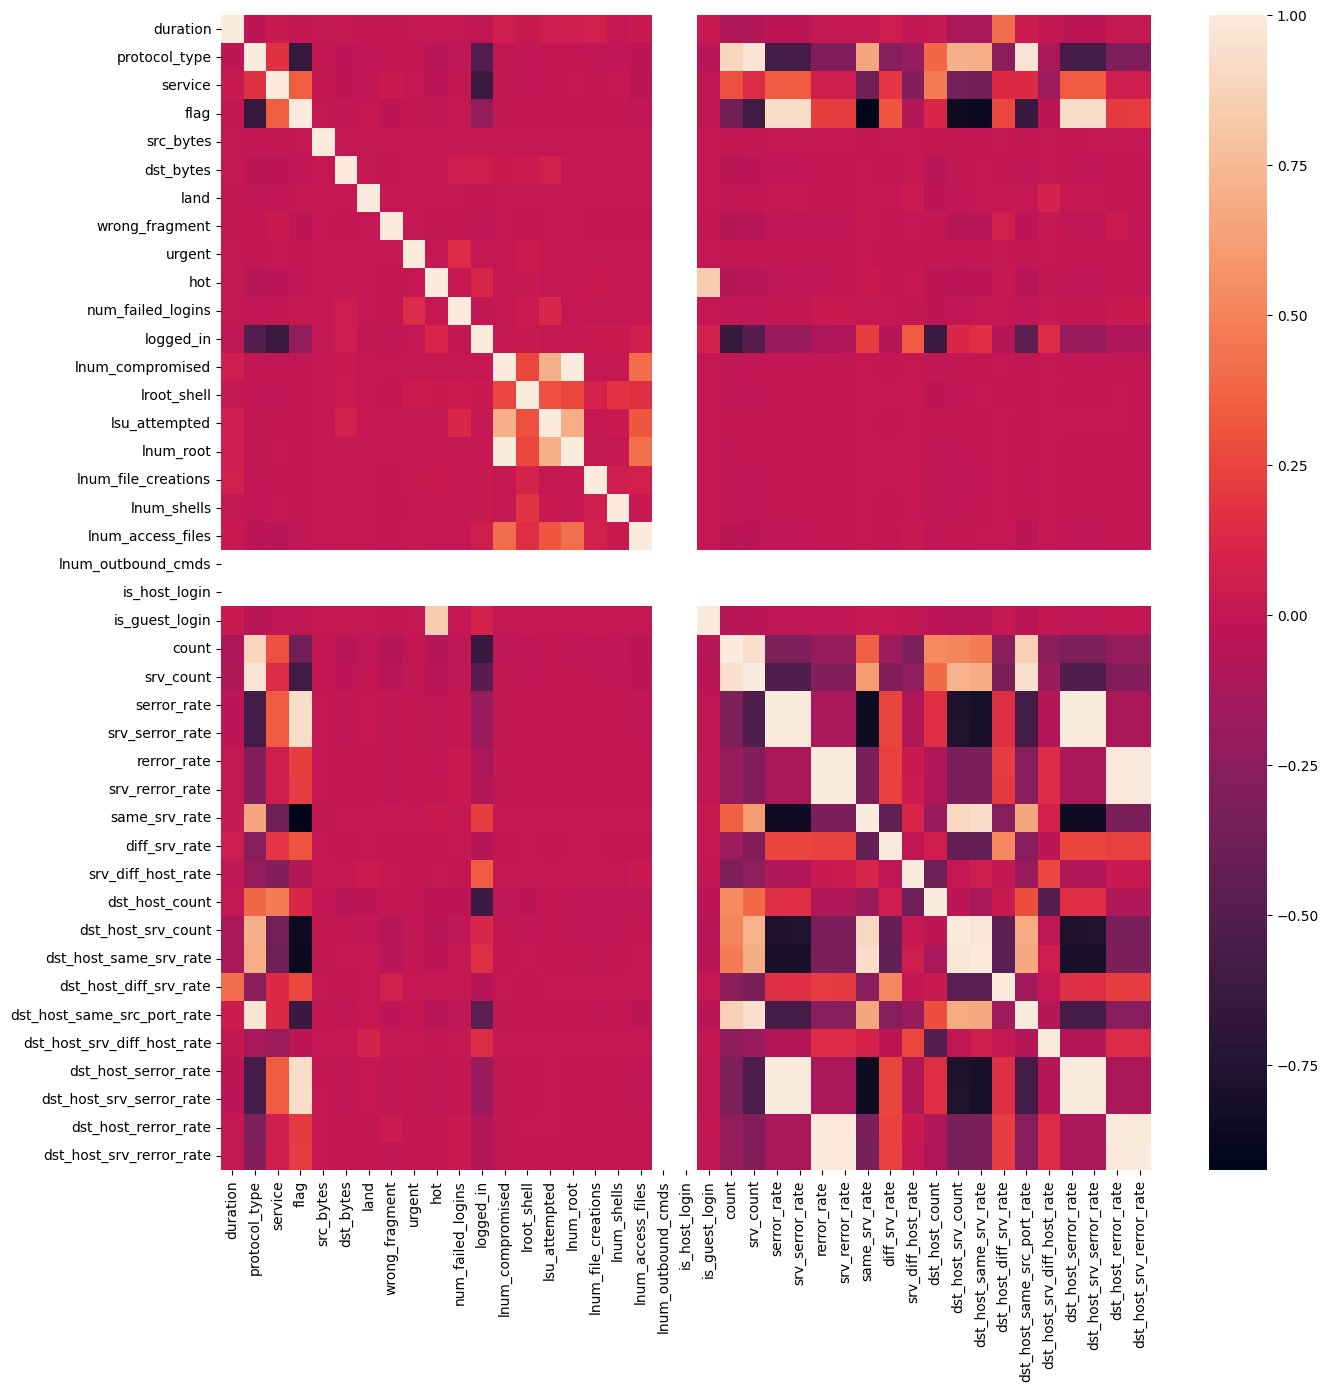

In [37]:
fig, ax = plt.subplots(figsize=(15,15)) 
# Create a temporary DataFrame with only numeric columns for the heatmap
temp_df = df.select_dtypes(include=[np.number])
sns.heatmap(temp_df.corr(), ax=ax)

In [38]:
# The "rerror_rate" column shows a strong correlation with both "dst_host_srv_serror_rate" and "dst_host_serror_rate." We can remove either of these two columns.

# "dst_host_serror_rate," "dst_host_rerror_rate," "dst_host_srv_count," and "same_srv_rate" are highly correlated. We can keep just one of them and drop the rest.
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

# The "srv_rerror_rate" column exhibits a strong correlation with "dst_host_srv_rerror_rate" and "dst_host_srv_serror_rate." Therefore, we can safely remove "dst_host_srv_rerror_rate" and "dst_host_rerror_rate."
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

# Several columns have high correlations: "lnum_root" with "lnum_compromised," "srv_rerror_rate" with "rerror_rate," "srv_serror_rate" with "serror_rate," "dst_host_same_srv_rate" with "dst_host_same_src_port_rate," and "dst_host_srv_count" with "dst_host_same_srv_count." To simplify the dataset, we can drop one column from each of these correlated pairs.
df.drop('lnum_root',axis = 1, inplace=True)
df.drop('srv_count',axis = 1, inplace=True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)
df.drop('dst_host_same_src_port_rate',axis = 1, inplace=True)

### Partitioning the Data into Training and Testing Sets

In [39]:

# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and the target variable (y)
X = df.drop("label", axis=1)
y = df["label"]

# Use train_test_split to create the training and testing sets
# with a test size of 25% and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Print the shapes of the training and testing datasets
print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of testing dataset: {X_test.shape}")


Shape of training dataset: (370515, 31)
Shape of testing dataset: (123505, 31)


Certain attack types have a limited number of instances, So will examine the distribution of labels within each dataset to assess their proportions.

In [40]:
# Checking Label Proportions in Training and Testing Datasets

# Calculate label proportions in the training data
train_label_proportions = y_train.value_counts(normalize=True)
print("Label Proportions in the Training Data:")
print(train_label_proportions)

# Calculate label proportions in the testing data
test_label_proportions = y_test.value_counts(normalize=True)
print("\nLabel Proportions in the Testing Data:")
print(test_label_proportions)


Label Proportions in the Training Data:
label
dos       0.792902
normal    0.196470
probe     0.008234
r2l       0.002286
u2r       0.000108
Name: proportion, dtype: float64

Label Proportions in the Testing Data:
label
dos       0.790867
normal    0.198227
probe     0.008550
r2l       0.002259
u2r       0.000097
Name: proportion, dtype: float64


The label proportions in both datasets are identical, which allows us to save them for use in the classification notebooks.

It's important to note that this preprocessing notebook does not include scaling since we plan to employ various classification algorithms. Scaling will be implemented separately in each classification notebook to ensure the appropriate scaling method is used for each algorithm.

### Utilizing Sampled Versions for Efficiency

Given the dataset's substantial size, we can opt for sampled versions to expedite training in select algorithms.

In [41]:
# Create a sampled version of the DataFrame with 100,000 rows
sampled_df = df.sample(n=100_000, random_state=101)

# Split the sampled dataset into features (X) and the target variable (y)
X_sampled = sampled_df.drop("label", axis=1)
y_sampled = sampled_df["label"]

# Use train_test_split to create training and testing sets for the sampled data
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=101)


Evaluating the Distribution of Label Proportions:

In [42]:
# Assessing Label Support in Different Datasets

# Calculate label support in the entire sampled dataset
sampled_label_proportions = sampled_df['label'].value_counts(normalize=True)
print("Label Support in the Sampled Dataset:")
print(sampled_label_proportions)

# Calculate label support in the training dataset
train_label_proportions_sampled = y_train_sampled.value_counts(normalize=True)
print("\nLabel Support in the Training Dataset:")
print(train_label_proportions_sampled)

# Calculate label support in the testing dataset
test_label_proportions_sampled = y_test_sampled.value_counts(normalize=True)
print("\nLabel Support in the Testing Dataset:")
print(test_label_proportions_sampled)


Label Support in the Sampled Dataset:
label
dos       0.79018
normal    0.19880
probe     0.00868
r2l       0.00225
u2r       0.00009
Name: proportion, dtype: float64

Label Support in the Training Dataset:
label
dos       0.789080
normal    0.200120
probe     0.008360
r2l       0.002347
u2r       0.000093
Name: proportion, dtype: float64

Label Support in the Testing Dataset:
label
dos       0.79348
normal    0.19484
probe     0.00964
r2l       0.00196
u2r       0.00008
Name: proportion, dtype: float64


### Exporting Datasets to Files

In [44]:
# Exporting Datasets to CSV Files

import os

# Define the directory path for saving the files
output_directory = "./data/"

# Create the directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define file names for the original datasets
training_data_file = "./data/kdd99_training_data.csv"
testing_data_file = "./data/kdd99_testing_data.csv"
training_labels_file = "./data/kdd99_training_labels.csv"
testing_labels_file = "./data/kdd99_testing_labels.csv"

# Save the original datasets to CSV files
X_train.to_csv(training_data_file, index=False)
X_test.to_csv(testing_data_file, index=False)
y_train.to_csv(training_labels_file, index=False, header=["label"])
y_test.to_csv(testing_labels_file, index=False, header=["label"])

# Define file names for the sampled datasets
sampled_training_data_file = "./data/sampled_kdd99_training_data.csv"
sampled_testing_data_file = "./data/sampled_kdd99_testing_data.csv"
sampled_training_labels_file = "./data/sampled_kdd99_training_labels.csv"
sampled_testing_labels_file = "./data/sampled_kdd99_testing_labels.csv"

# Save the sampled datasets to CSV files
X_train_sampled.to_csv(sampled_training_data_file, index=False)
X_test_sampled.to_csv(sampled_testing_data_file, index=False)
y_train_sampled.to_csv(sampled_training_labels_file, index=False, header=["label"])
y_test_sampled.to_csv(sampled_testing_labels_file, index=False, header=["label"])
